In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# Read data

## COVID Cases in Colombia

In [2]:
covid_cases = pd.read_csv('Covid_Cases_Colombia/output_datasets/daily_covid_cases_in_Colombia.csv')
covid_cases['epiweek'] = pd.to_datetime(covid_cases['epiweek'])
covid_cases = covid_cases.rename(columns={'epiweek':'date'})
covid_cases

,date,Cases
0,2020-03-02,1.0
1,2020-03-03,1.0
2,2020-03-04,0.0
3,2020-03-05,0.0
4,2020-03-06,1.0
...,...,...
788,2022-04-29,125.0
789,2022-04-30,74.0
790,2022-05-01,53.0
791,2022-05-02,66.0


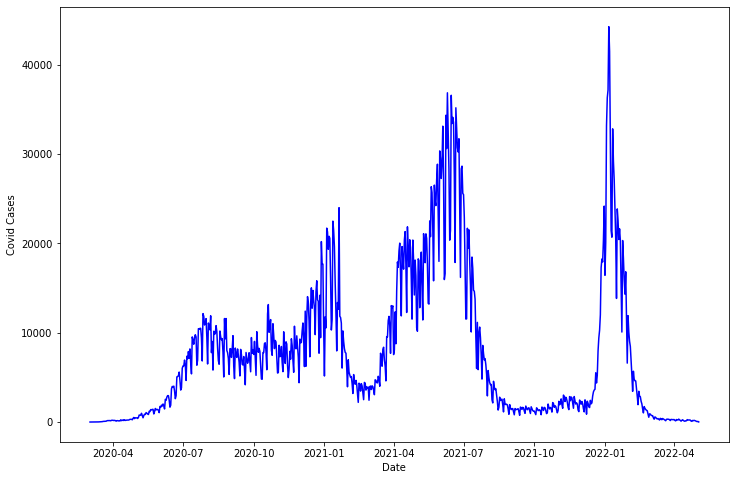

In [3]:
plt.figure(figsize = (12, 8))
plt.plot(covid_cases.date, covid_cases.Cases, color ='blue')
plt.xlabel('Date') 
plt.ylabel('Covid Cases')
plt.show()

## COVID Mobility in Colombia

In [4]:
colombia_mobility = pd.read_csv('Google_Data/Google_Mobility/Mobility_Colombia/mobility_colombia.csv')
colombia_mobility['date'] = pd.to_datetime(colombia_mobility['date'])
colombia_mobility

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,-6.569536,-2.630252,-15.682848,-14.753086,5.266272,1.261682
1,2020-02-16,-5.907801,1.018519,-14.738854,-17.493827,-0.298507,2.500000
2,2020-02-17,-4.377953,1.136364,-7.422642,2.897436,15.296296,-1.288000
3,2020-02-18,-4.661417,-1.623853,-7.338403,1.773333,16.084656,-1.650794
4,2020-02-19,-5.909091,-4.467890,-8.819853,0.435897,13.041451,-1.905512
...,...,...,...,...,...,...,...
814,2022-05-09,16.883333,46.515152,11.991701,30.457143,48.916996,4.833333
815,2022-05-10,20.853448,51.385417,17.454167,29.544118,57.861660,3.358621
816,2022-05-11,19.154472,45.561224,16.274590,27.800000,56.860558,3.326531
817,2022-05-12,24.480000,48.031250,22.159184,30.742857,55.767717,2.609589


In [5]:
colombia_mobility.dtypes

date                                                  datetime64[ns]
retail_and_recreation_percent_change_from_baseline           float64
grocery_and_pharmacy_percent_change_from_baseline            float64
parks_percent_change_from_baseline                           float64
transit_stations_percent_change_from_baseline                float64
workplaces_percent_change_from_baseline                      float64
residential_percent_change_from_baseline                     float64
dtype: object

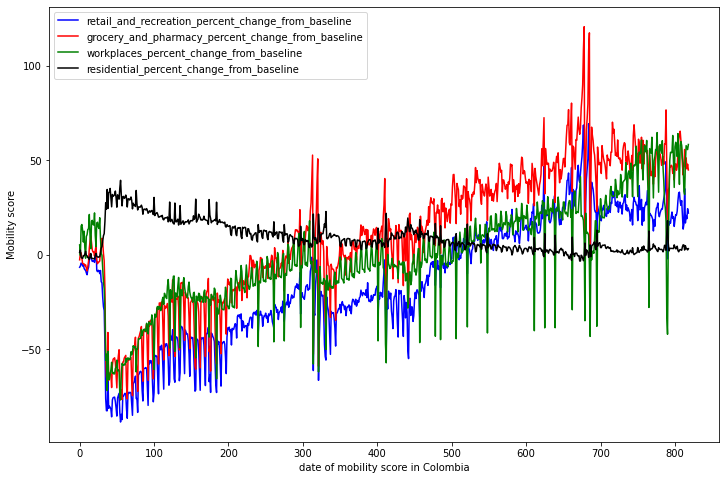

In [6]:
# Covid cases in time
plt.figure(figsize = (12, 8))
plt.plot(colombia_mobility.index, colombia_mobility['retail_and_recreation_percent_change_from_baseline'], color ='blue', label='retail_and_recreation_percent_change_from_baseline')
plt.plot(colombia_mobility.index, colombia_mobility['grocery_and_pharmacy_percent_change_from_baseline'], color ='red', label='grocery_and_pharmacy_percent_change_from_baseline')
plt.plot(colombia_mobility.index, colombia_mobility['workplaces_percent_change_from_baseline'], color ='green', label='workplaces_percent_change_from_baseline')
plt.plot(colombia_mobility.index, colombia_mobility['residential_percent_change_from_baseline'], color ='black', label='residential_percent_change_from_baseline')
plt.xlabel('date of mobility score in Colombia') 
plt.ylabel('Mobility score')
plt.legend()

## Merge Dataframes

In [8]:
colombia_df = colombia_mobility.merge(covid_cases, how='inner', on="date")
colombia_df.set_index('date', inplace=True)
colombia_df

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Cases
date,,,,,,,
2020-03-02,-2.362205,6.216216,-7.699248,1.615385,17.797872,-1.825397,1.0
2020-03-03,-3.480000,2.555556,-8.198529,-0.320513,18.291005,-1.881890,1.0
2020-03-04,-3.189394,1.490741,-6.159259,-1.531646,16.036082,-2.007692,0.0
2020-03-05,-3.046154,1.570093,-5.978182,-0.435897,15.796875,-1.938462,0.0
2020-03-06,-3.978102,-0.607143,-9.683502,0.132530,22.229508,-2.256000,1.0
...,...,...,...,...,...,...,...
2022-04-29,28.734375,54.346939,22.787645,27.844156,64.234568,2.295775,125.0
2022-04-30,32.681159,60.704762,29.571942,39.256757,49.647321,1.646154,74.0
2022-05-01,33.223022,63.901099,32.505226,36.794521,37.321244,2.532110,53.0


# Pre-processing

## Prepare data to supervised learning time series

we will use:

* data: is the dataframe in our case (Covid Cases and Google Mobile Data)
* n_in: is the number of lag weeks in the past (length of window)

The heart of this "series_to_supervised" function is the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html">shift</a> fuction of pandas

This function gets as input the number of periods(in this case the number of days represented as rows up or down in the dataframe) to move the columns of a dataframe. E.g.

If we have df.shift(1) all the rows of column cases_medellin will move one row down
If we have df.shift(-1) all the rows of column cases_medellin will move one row up

In [11]:
# prepare data for lstm

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


## normalize features
As we are working with a Neural Network the data values ​​must be normalized to help backpropagation algorithm So we will use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScaler</a> from sklearn

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1)) # Scaler between 0 and 1
scaled = scaler.fit_transform(colombia_df) # As we can see data set has 3 Columns (This shape is also important for inverse scaler as we will see in future)

In [20]:
# length of window
days = 5

# frame as supervised learning
data = series_to_supervised(scaled, n_in=days)
DataFrame(data)

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var1(t-4),var2(t-4),var3(t-4),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
5,0.545480,0.419901,0.464994,0.612165,0.668078,0.033621,0.000023,0.538404,0.401380,0.461680,...,0.699395,0.023552,0.000023,0.547266,0.399539,0.451571,0.554442,0.614921,0.070993,0.000023
6,0.538404,0.401380,0.461680,0.598666,0.671563,0.032300,0.000023,0.540244,0.395992,0.475214,...,0.614921,0.070993,0.000023,0.602025,0.413607,0.482119,0.529535,0.573184,0.093776,0.000045
7,0.540244,0.395992,0.475214,0.590221,0.655628,0.029359,0.000000,0.541150,0.396394,0.476416,...,0.573184,0.093776,0.000045,0.508699,0.374061,0.434286,0.584395,0.661219,0.057158,0.000068
8,0.541150,0.396394,0.476416,0.597861,0.653938,0.030978,0.000000,0.535252,0.385378,0.451824,...,0.661219,0.057158,0.000068,0.504113,0.364792,0.435835,0.574491,0.664496,0.051253,0.000090
9,0.535252,0.385378,0.451824,0.601825,0.699395,0.023552,0.000023,0.547266,0.399539,0.451571,...,0.664496,0.051253,0.000090,0.508684,0.368955,0.446074,0.575959,0.646631,0.046529,0.000181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,0.655820,0.589214,0.621396,0.808325,0.794744,0.200443,0.001829,0.677216,0.626710,0.630070,...,0.910477,0.183487,0.003703,0.742306,0.663417,0.667335,0.795060,0.996226,0.129993,0.002823
789,0.677216,0.626710,0.630070,0.833762,0.947334,0.174098,0.003952,0.695213,0.632569,0.656226,...,0.996226,0.129993,0.002823,0.767287,0.695584,0.712362,0.874641,0.893145,0.114802,0.001671
790,0.695213,0.632569,0.656226,0.793955,0.963826,0.151945,0.003410,0.693750,0.615300,0.642361,...,0.893145,0.114802,0.001671,0.770717,0.711756,0.731830,0.857472,0.806041,0.135520,0.001197
791,0.693750,0.615300,0.642361,0.807091,0.941891,0.154203,0.004313,0.707065,0.624115,0.645299,...,0.806041,0.135520,0.001197,0.740221,0.719898,0.701816,0.866874,0.952227,0.142402,0.001490


### Features Set

In [22]:
# We define the number of features as 7 (Cases and 6 from google mobility)
n_features = 7

# The features to train the model will be all except the values of the actual week 
# We can't use the temperature and precipitation in week t because whe need to resample a a 3D Array
features_set = DataFrame(data.values[:,:-n_features])
# Convert pandas data frame to np.array to reshape as 3D Array
features_set = features_set.to_numpy()
features_set.shape

(788, 35)

### Labels Set

In [24]:
# We will use Dengue cases in last week 
labels_set = DataFrame(data.values[:,-1])
# Convert pandas data frame to np.array
labels_set = labels_set.to_numpy()
labels_set.shape

(788, 1)

## Train Test Split

In [25]:
# We need a sequence so we can't split randomly
# To divide into Train (90%) and test (10%) to do that we need to know the 90% of the total dataframe
size = features_set.shape[0]
split = int(size*(9/10))

### Train

In [26]:
# We will train with 1st 90% of data and test with last 10%
train_X = features_set[:split] ##90% train
train_y = labels_set[:split]  ##90% train

### Test

In [27]:
test_X = features_set[split:] ##10% test
test_y = labels_set[split:] ##10% test

### Reshape to tensor

In [29]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], days, n_features))
test_X = test_X.reshape((test_X.shape[0], days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(709, 5, 7) (709, 1) (79, 5, 7) (79, 1)


# Model
## LSTM

In [39]:
# Set Seed
tf.random.set_seed(1)


# design network
model = Sequential()
model.add(LSTM(60, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(120, input_shape=(train_X.shape[1], 60)))
model.add(Dense(60))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 5, 60)             16320     
                                                                 
 lstm_6 (LSTM)               (None, 120)               86880     
                                                                 
 dense_3 (Dense)             (None, 60)                7260      
                                                                 
 dense_4 (Dense)             (None, 1)                 61        
                                                                 
Total params: 110,521
Trainable params: 110,521
Non-trainable params: 0
_________________________________________________________________


## Train

In [41]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50


2022-05-16 23:13:17.026876: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 23:13:18.284609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-16 23:13:18.477658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-16 23:13:18.984207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-16 23:13:19.094498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-16 23:13:19.486021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-16 23:13:20.185992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

10/10 - 3s - loss: 0.2010 - val_loss: 0.3779 - 3s/epoch - 339ms/step
Epoch 2/50
10/10 - 0s - loss: 0.1264 - val_loss: 0.1036 - 149ms/epoch - 15ms/step
Epoch 3/50
10/10 - 0s - loss: 0.1223 - val_loss: 0.1365 - 144ms/epoch - 14ms/step
Epoch 4/50
10/10 - 0s - loss: 0.0843 - val_loss: 0.0324 - 149ms/epoch - 15ms/step
Epoch 5/50
10/10 - 0s - loss: 0.0657 - val_loss: 0.0175 - 152ms/epoch - 15ms/step
Epoch 6/50
10/10 - 0s - loss: 0.0770 - val_loss: 0.0804 - 139ms/epoch - 14ms/step
Epoch 7/50
10/10 - 0s - loss: 0.0933 - val_loss: 0.0057 - 143ms/epoch - 14ms/step
Epoch 8/50
10/10 - 0s - loss: 0.1057 - val_loss: 0.0595 - 148ms/epoch - 15ms/step
Epoch 9/50
10/10 - 0s - loss: 0.0874 - val_loss: 0.0848 - 146ms/epoch - 15ms/step
Epoch 10/50
10/10 - 0s - loss: 0.0646 - val_loss: 0.0108 - 143ms/epoch - 14ms/step
Epoch 11/50
10/10 - 0s - loss: 0.0506 - val_loss: 0.0610 - 152ms/epoch - 15ms/step
Epoch 12/50
10/10 - 0s - loss: 0.0550 - val_loss: 0.0337 - 152ms/epoch - 15ms/step
Epoch 13/50
10/10 - 0s - l

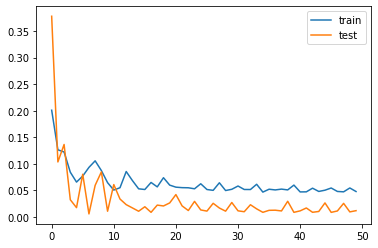

In [42]:
from matplotlib import pyplot
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Test

In [43]:
from math import sqrt
from numpy import concatenate

# make a prediction
yhat = model.predict(test_X)

2022-05-16 23:13:42.488936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-16 23:13:42.554449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-16 23:13:42.579554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [44]:
yhat.shape

(79, 1)

In [46]:
# Convert test data to 2D 
test_X = test_X.reshape((test_X.shape[0], days*n_features))

# invert scaling for forecast
# As we said Scaler needs 3 columns so we can take those columns from test data and take again the predictions
# Concatenate last 2 columns of test data with predicted data (yhat)
inv_yhat = concatenate((test_X[:, -(n_features-1):], yhat), axis=1)
# Inverse Scaler
inv_yhat = scaler.inverse_transform(inv_yhat)
# Take predicted data scaled to original Dengue cases
inv_yhat = inv_yhat[:,-1]

# invert scaling for actual
# Same process than for predicted data (yhat)
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_X[:, -(n_features-1):], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [50]:
from sklearn.metrics import  mean_absolute_error

# calculate MAE
mae = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)

Test MAE: 523.701


# Plot predicted vs actual dengue cases

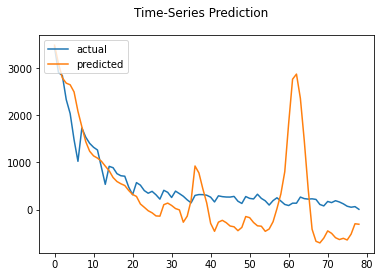

In [51]:
data_predict = inv_yhat  ## predicted target  cases
dataY_plot = inv_y  ##  real test-target cases

data_predict = data_predict.reshape(len(data_predict), 1)
dataY_plot = dataY_plot.reshape(len(dataY_plot), 1)

import matplotlib.pyplot as plt

plt.plot(dataY_plot, label = 'actual')
plt.plot(data_predict, label = 'predicted')
plt.legend(loc="upper left")

plt.suptitle('Time-Series Prediction')
plt.show()